In [1]:
import cupy as cp
import numpy as np
import time
import math
from importlib.machinery import SourceFileLoader
from scipy.special import erf
import matplotlib.pyplot as plt


In [19]:
def CruijffExtended(m, m0, sigmaL, sigmaR, alphaL, alphaR, beta):
    sigma = 0.0
    alpha = 0.0
    dx = m - m0

    sigma = cp.where(dx < 0, sigmaL, sigmaR)
    alpha = cp.where(dx < 0, alphaL, alphaR)

    f = 2.0*sigma*sigma + alpha*dx*dx
    return cp.exp(-dx**2 *(1 + beta * dx **2)/f)  

def Gaussian(m, mu, sigma):
    return (cp.exp(-0.5*((m-mu)/sigma)**2))/(sigma*cp.sqrt(2*cp.pi))

def addPdf(pdflist=[], frac=[]):
    pdf = cp.zeros(len(pdflist[0]))

    if len(pdflist) != len(frac):
        if len(frac) ==1:
            pdf = frac[0]*pdflist[0] + (1-frac[0])*pdflist[1]

            return pdf
        else:
            return None and print('The length of the list of pdfs and the list of fractions must be the same')
    
    else:
        for i in range(len(pdflist)):
                pdf += frac[i]*pdflist[i]
        return pdf
    
def norm_pdf(pdf):
    norm_term = cp.mean(pdf)
    return pdf/norm_term/len(pdf)

In [13]:
config_mass_shape_output = SourceFileLoader('config_mass_shape_output', '/software/pc24403/PCBPGGSZ/outputs/toy/mass_fit/config/%s'%('config_mass_shape_output_1.py')).load_module()
varDict = config_mass_shape_output.getconfig()
Bu_M = cp.linspace(5080, 5800, 1000)

In [14]:
#Build the lineshape

pdf_sig_Cruijff_DK_KsPiPi_DD = CruijffExtended(Bu_M, varDict['signal_mean'], varDict['sigma_dk_DD'], varDict['sigma_dk_DD'], varDict['DD_dk_Cruijff_alpha_L'], varDict['DD_dk_Cruijff_alpha_R'], varDict['Cruijff_beta'])

1.0000000000000004


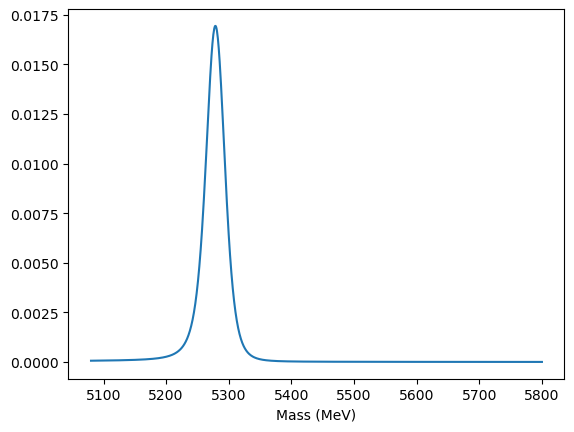

In [23]:
#plot the lineshape
plt.plot(Bu_M.get(), norm_pdf(pdf_sig_Cruijff_DK_KsPiPi_DD.get()), label='Cruijff')
plt.xlabel('Mass (MeV)')
print(sum(norm_pdf(pdf_sig_Cruijff_DK_KsPiPi_DD)))